In [1]:
from IPython.core.display import HTML
css_file = '../../../style/style01.css'
HTML(open(css_file, "r").read())

In [2]:
from IPython.core.display import HTML

> Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License) 2016-2017 Sergio Rojas (srojas@usb.ve) 

<b> <center> 
### Curve Fitting with the SciPy Library


In [3]:
HTML('<iframe src=http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html width=800 height=450></iframe>')

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scistat

In [5]:
themean = 5.5 ;  thestd = 4. ;  nrv = 1000
vals = scistat.norm.rvs(loc=themean, scale=thestd, size=nrv, random_state=654321)

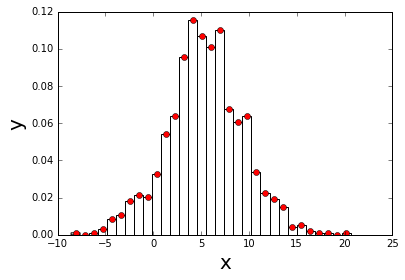

In [6]:
fig, ax = plt.subplots(1, 1)

yc, xtemp, temp = ax.hist(vals, int(np.sqrt(len(vals))), normed=True, color='w')
xc = (xtemp[1:] + xtemp[0:-1])/2.

plt.plot(xc,yc, 'ro')

ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
plt.show()

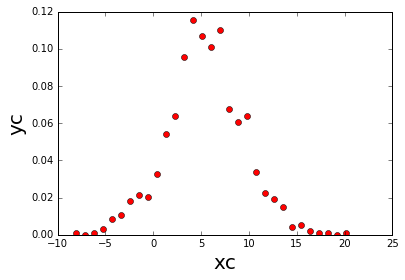

In [7]:
plt.plot(xc,yc, 'ro')
plt.xlabel('xc', fontsize = 20)
plt.ylabel('yc', fontsize = 20)
plt.show()

It is necessary to pick a functional form to fit our data. In this case we know the data comes from a Gaussian function, but the shape of the data could guide us to pick the functional form:



<div style="font-size: 150%;">  
$$ f(x,\mu,\sigma) = \frac{1} { \sqrt{2 \pi \sigma^2} }  e^{-\frac{(x-\mu)^2}{2\sigma^2}} = A e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
</div>




In [8]:
# Define model function to be used to fit to the data above:
def gaussian(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [9]:
# Setting the initial guess for the fitting coefficients (A, mu and sigma above)
A = 0.10
mu = 10.
sigma = 7.
p_ini = [A, mu, sigma]

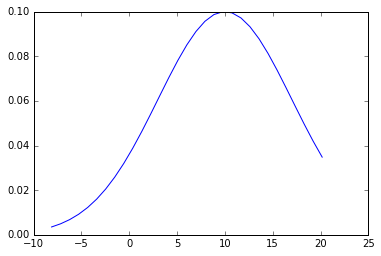

In [10]:
plt.plot(xc, gaussian(xc, *p_ini))
#plt.plot(xc,yc, 'ro')

In [11]:
from scipy.optimize import curve_fit

fitted_vals, fitted_matrix = curve_fit(gaussian, xc, yc, p0=p_ini)
print ('Fitted amplitude A = ', fitted_vals[0])
print ('Fitted mean = ', fitted_vals[1])
print ('Fitted standard deviation = ', fitted_vals[2])
print ('Parameters Standard Errors = ', np.sqrt(np.diag(fitted_matrix)))

Fitted amplitude A =  0.108370693161
Fitted mean =  5.41287260303
Fitted standard deviation =  3.57569029205
Parameters Standard Errors =  [ 0.00328387  0.12511199  0.12511241]


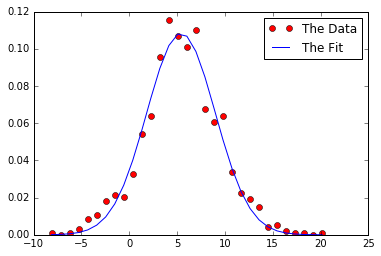

In [12]:
# Showing the fitted curve along with the input data
y_fitted = gaussian(xc, *fitted_vals)

plt.plot(xc, yc, 'ro', label='The Data')
plt.plot(xc, y_fitted, label='The Fit')

plt.legend()
plt.show()

<b> References </b>

* ** [NumPy Polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) **

* ** [Fitting data from the Scipy Cookbook](http://scipy-cookbook.readthedocs.io/items/FittingData.html) **

* ** [Non-Linear Least-Square Minimization and Curve-Fitting for Python](https://lmfit.github.io/lmfit-py/index.html) **


> Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License) 2016-2017 Sergio Rojas (srojas@usb.ve) 